<a href="https://colab.research.google.com/github/Sriharshaanupa/ScreenShare-Python/blob/main/automate%20detection%20of%20different%20emotions%20from%20textual%20comments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:

!pip install neattext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [103]:
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [45]:
pip install neattext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [46]:
!pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [47]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [48]:
#load packages

import pandas as pd
import numpy as np

#load data visualisation packages
import seaborn as sns
import matplotlib.pyplot as plt

#text cleaning
import neattext.functions as nfx

In [49]:
!pip install neatext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement neatext (from versions: none)
ERROR: No matching distribution found for neatext


In [50]:
#load dataset
df=pd.read_csv("/content/emotion_dataset_2.txt")

In [51]:
df.head()

,Unnamed: 0,Emotion,Text,Clean_Text
0,0,neutral,Why ?,NaN
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...


In [52]:
df.shape #shape

(34792, 4)

In [53]:
#datatypes
df.dtypes
#check for missing values
df.isnull().sum()

Unnamed: 0      0
Emotion         0
Text            0
Clean_Text    466
dtype: int64

In [54]:
#value counts for emotion
df['Emotion'].value_counts()


joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

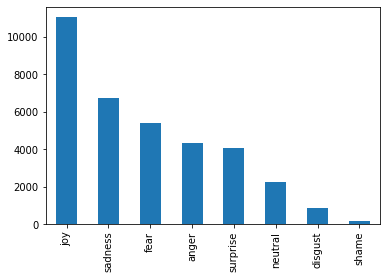

In [55]:
df['Emotion'].value_counts().plot(kind='bar')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


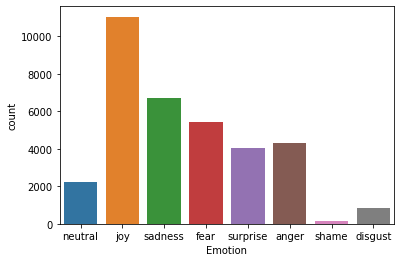

In [56]:
#using seaborn to plot
sns.countplot(df['Emotion'])

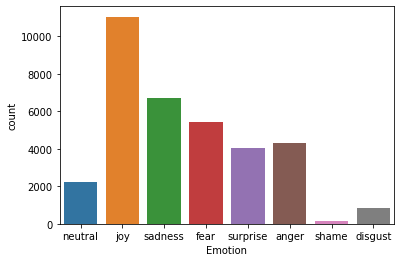

In [57]:
#new method
sns.countplot(x='Emotion',data=df)

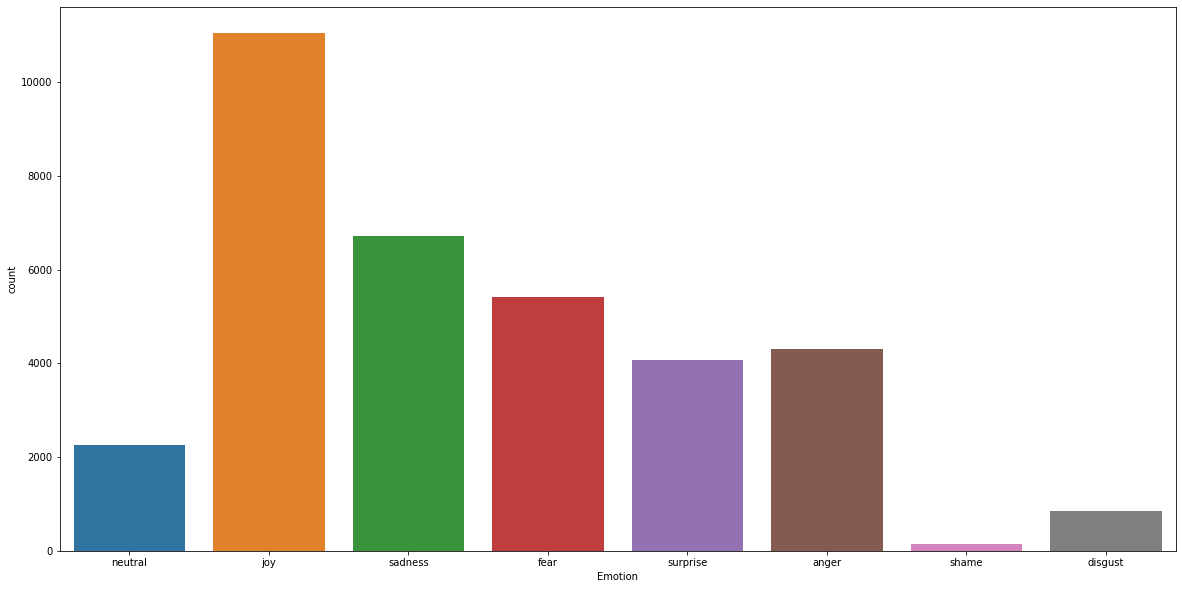

In [58]:
plt.figure(figsize=(20,10))
sns.countplot(x='Emotion',data=df)
plt.show()
#new method

In [59]:
#exploarartion
#sentiment analysis
#keyword extraction
#wordcloud
#keyword for each emotion


In [60]:
#sentiment analysis
from textblob import TextBlob


In [61]:
def get_sentiment (text):
    blob = TextBlob(text)
    sentiment=blob.sentiment.polarity
    if sentiment > 0:
      result="Positive"
    elif sentiment<0:
        result="Negative"
    else:
      result="Neutral"
    return result

In [62]:
#test Ffxn
get_sentiment("i love so much and hate so much coding")

'Positive'

In [63]:
df['sentiment']=df['Text'].apply (get_sentiment)

In [64]:
df.head()

,Unnamed: 0,Emotion,Text,Clean_Text,sentiment
0,0,neutral,Why ?,NaN,Neutral
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow,Neutral
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...,Negative
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...,Positive
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...,Neutral


In [65]:
#compare emotion vs sentiment
df.groupby(['Emotion','sentiment']).size()

Emotion   sentiment
anger     Negative     1787
          Neutral      1386
          Positive     1124
disgust   Negative      325
          Neutral       249
          Positive      282
fear      Negative     1534
          Neutral      1843
          Positive     2033
joy       Negative     1682
          Neutral      3648
          Positive     5715
neutral   Negative      178
          Neutral      1523
          Positive      553
sadness   Negative     2630
          Neutral      2127
          Positive     1965
shame     Negative       46
          Neutral        50
          Positive       50
surprise  Negative      623
          Neutral      1545
          Positive     1894
dtype: int64

# New Section

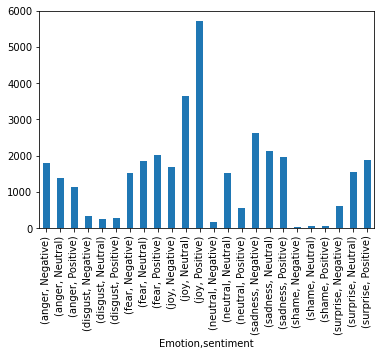

In [66]:
#first method using matplotlib
#compare our emotion vs sentiment
df.groupby(['Emotion','sentiment']).size().plot(kind='bar')

In [67]:
#using seaborn
sns.factorplot
sns.catplot

<function seaborn.categorical.catplot(*, x=None, y=None, hue=None, data=None, row=None, col=None, col_wrap=None, estimator=<function mean at 0x7fc1bf23b4d0>, ci=95, n_boot=1000, units=None, seed=None, order=None, hue_order=None, row_order=None, col_order=None, kind='strip', height=5, aspect=1, orient=None, color=None, palette=None, legend=True, legend_out=True, sharex=True, sharey=True, margin_titles=False, facet_kws=None, **kwargs)>

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


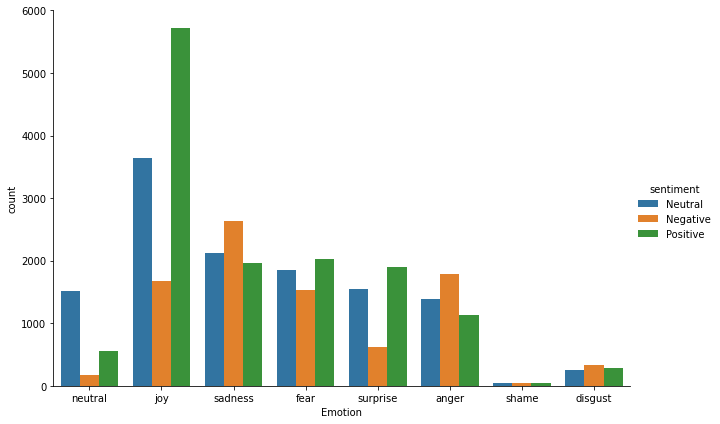

In [68]:
sns.factorplot(x='Emotion',hue='sentiment',data=df,kind='count',size=6,aspect=1.5)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


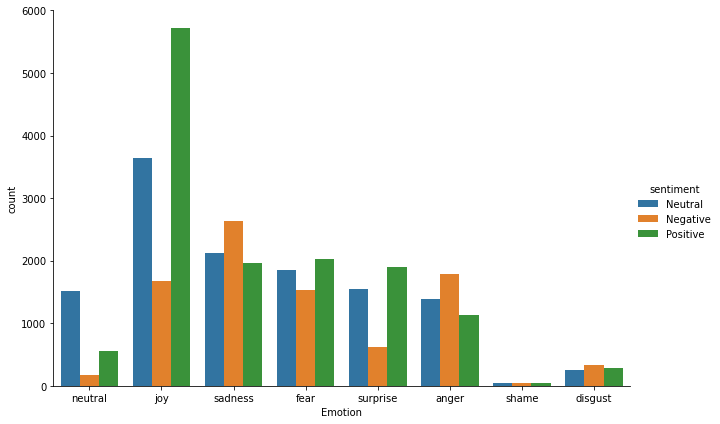

In [69]:
sns.catplot(x='Emotion',hue='sentiment',data=df,kind='count',size=6,aspect=1.5)

In [70]:
#text cleaning
#remove noise
#stopwords
#special characters
#punctuations
#emojis



In [71]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [72]:
df['Clean_Text']=df['Text'].apply(nfx.remove_stopwords)

In [73]:
df['Clean_Text']=df['Clean_Text'].apply(nfx.remove_punctuations)

In [74]:
df['Clean_Text']=df['Clean_Text'].apply(nfx.remove_userhandles)

In [75]:
df[['Text','Clean_Text']]

,Text,Clean_Text
0,Why ?,
1,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...
...,...,...
34787,@MichelGW have you gift! Hope you like it! It'...,gift Hope like it hand wear Itll warm Lol
34788,The world didnt give it to me..so the world MO...,world didnt meso world DEFINITELY cnt away
34789,A man robbed me today .,man robbed today
34790,"Youu call it JEALOUSY, I call it of #Losing YO...",Youu JEALOUSY #Losing YOU


In [76]:
#keyword extraction
#extract most common words per class of emotion

In [77]:
!pip install collection

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for collection: filename=collection-0.1.6-py3-none-any.whl size=5115 sha256=415a76ac1192a892852997173a4d475e2d8ae952bf825fcd594b2d808f940e01
  Stored in directory: /root/.cache/pip/wheels/45/ed/3c/29a1c0600bb908a2e7421dc3a3775cbaed434a71b4ed93a439
Successfully built collection


In [78]:
!pip install counter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [79]:
from collections import Counter

In [80]:
def extract_keywords(text,num=50):
    tokens=[ tok for tok in text.split()]
    most_common_tokens=Counter(tokens).most_common(num)
    return dict(most_common_tokens)

In [81]:
#list of emotions
emotion_list = df['Emotion'].unique().tolist()

In [82]:
emotion_list

['neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger', 'shame', 'disgust']

In [83]:
joy_list=df[df['Emotion']=='joy']['Clean_Text'].tolist()

In [84]:
#sad document
joy_docx = ''.join(joy_list)

In [85]:
joy_docx

'Sage Act upgrade list tommoroweye  true hazel eyeand brilliant  Regular features  open countenance  complexion  Oh  bloom health  pretty height size  firm upright figure  health  merely bloom  air  head  glance  hears child  picture health    gives idea complete picture grownup health  loveliness   ugh babe hugggzzz u  babe naamazed nga ako e babe e despite negas mas pinaramdam fil ko anglife  Leopold truly happy : hopes prayers beloved son come fruition feeling fail french #fuckfrenchGoodLet  fell love \\X\\ Overnight felt confidence selfesteem responsible worthwhileterribly ecstatic dangerous thing selected study universityYeah  ’ ages  passed BA exams class resultsheard selected fot year university Zambia form Chikola secondary schoolWelp time study daysHeading campus rain grad photosfeeling awesome   brings  Ive bought Christmas presents trawl loads shops :)shit pants Pure 100% gravylife  Leopold truly happy : hopes prayers beloved son come fruition Class jamming paper quarter rea

In [86]:
#extract keywords
keyword_joy = extract_keywords(joy_docx)

In [87]:
keyword_joy

{'amp': 652,
 'day': 582,
 'time': 468,
 'Im': 453,
 'like': 439,
 'work': 400,
 'Christmas': 370,
 'today': 318,
 'good': 312,
 'tomorrow': 304,
 'happy': 303,
 'love': 283,
 'going': 283,
 'night': 250,
 'got': 248,
 'home': 248,
 'school': 233,
 '2': 232,
 'morning': 225,
 'joy': 214,
 'life': 208,
 'hours': 201,
 'feel': 193,
 'year': 183,
 'people': 179,
 'long': 178,
 's': 176,
 'new': 172,
 'great': 168,
 'days': 166,
 'week': 163,
 'sleep': 158,
 'know': 158,
 'family': 157,
 'RT': 156,
 'hour': 152,
 'God': 143,
 ':)': 143,
 'cant': 137,
 'excited': 135,
 'tonight': 134,
 'friends': 128,
 'feeling': 126,
 'felt': 126,
 'friend': 126,
 'right': 124,
 '3': 123,
 'old': 121,
 'me': 121,
 'think': 119}

In [104]:
#PLOT
def plot_most_common_words(mydict):
  df_01 = pd.DataFrame(mydict.items(),columns=['token','count']) 
  plt.figure(figsize=(20,10))
  sns.barplot(x='token',y='count',data=df_01)
  plt.xticks(rotation=45)
  plt.show()

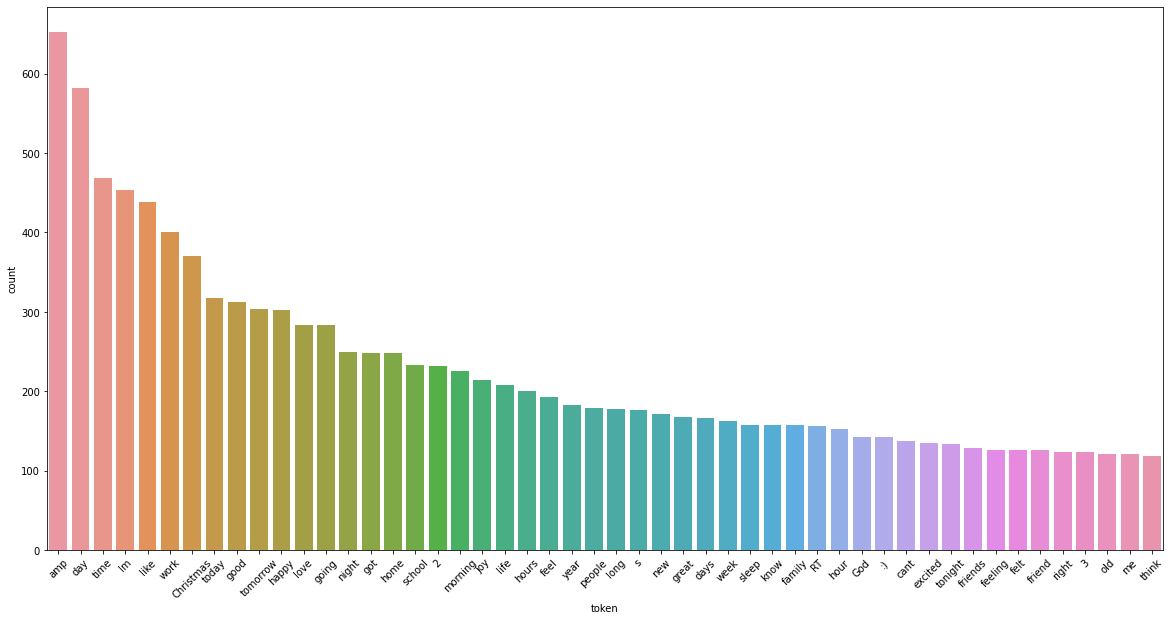

In [105]:
plot_most_common_words(keyword_joy)

In [95]:
"""surprise_list=df[df['Emotion']=='surprise']['Clean_Text'].tolist()
#document
surprise_docx=' '.join(surprise_list)
#extract keywords
keywords_surprise=extract_keywords(surprise_docx)"""

In [ ]:
"""plot_most_common_words(keyword_joy"""

In [111]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [112]:
from wordcloud import WordCloud

In [115]:
def plot_wordcloud(docx):
  mywordcloud=WordCloud().generate(docx)
  plt.figure(figsize=(20,10))
  plt.imshow(mywordcloud,interpolation='bilinear')
  plt.axis('off')
  plt.show()


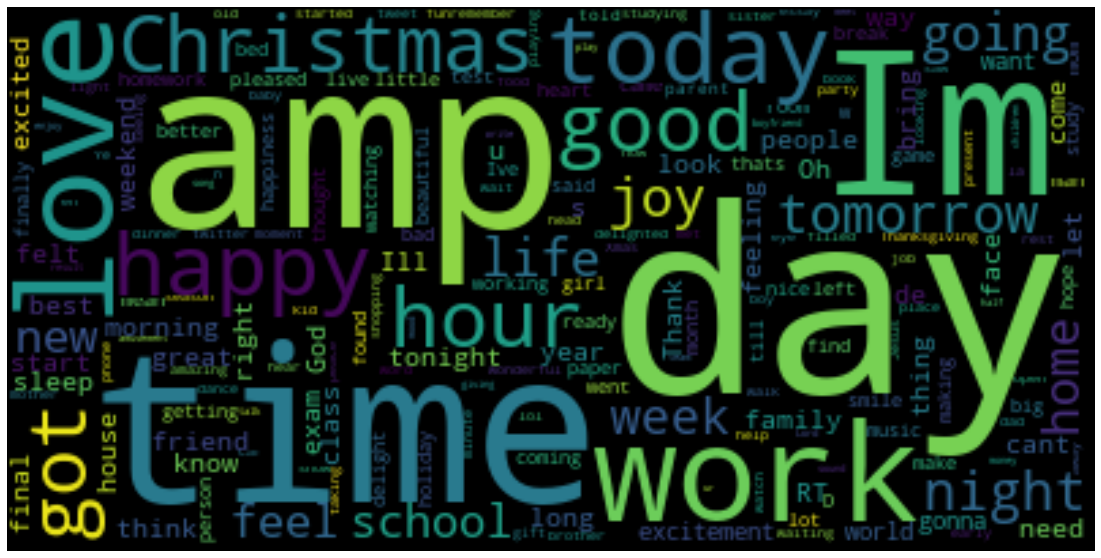

In [117]:
plot_wordcloud(joy_docx)

In [ ]:
#machine learning
#naiive bayes
#logistic regression
#kinn
#decision tree
#compare with sparknlp and nlu

In [121]:
#load ml packages
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
#VECTORIZER
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

#metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [119]:
#split our dataset
from sklearn.model_selection import train_test_split

In [120]:
#build features from our text
Xfeatures = df['Clean_Text']
ylabels= df['Emotion']

In [122]:
Xfeatures

0                                                         
1                           Sage Act upgrade list tommorow
2        WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3        eye  true hazel eyeand brilliant  Regular feat...
4          ugh babe hugggzzz u  babe naamazed nga ako e...
                               ...                        
34787           gift Hope like it hand wear  Itll warm Lol
34788           world didnt meso world DEFINITELY cnt away
34789                                    man robbed today 
34790                            Youu JEALOUSY #Losing YOU
34791                                think baby dream time
Name: Clean_Text, Length: 34792, dtype: object

In [124]:
#vectorizer
CV= CountVectorizer()
X=CV.fit_transform(Xfeatures)

In [125]:
#GET FEATURES BY NAME
CV.get_feature_names

<bound method CountVectorizer.get_feature_names of CountVectorizer()>

In [127]:
#to dense array(numpy)
#X.toarray()


In [126]:
#split dataset
X_train,X_test,y_train,y_test=train_test_split(X,ylabels,test_size=0.3,random_state=42)

In [128]:
#BUILD OUR MODEL
nv_model=MultinomialNB()
nv_model.fit(X_train,y_train)

MultinomialNB()

In [129]:
#accuracy method
nv_model.score(X_test,y_test)

0.5642843456600881

In [130]:
#predictions
y_pred_for_nv=nv_model.predict(X_test)

In [135]:
y_pred_for_nv

array(['fear', 'sadness', 'sadness', ..., 'sadness', 'anger', 'sadness'],
      dtype='<U8')

In [136]:
#make a single prediction
#vecgtorized our text
#applied our model

In [137]:
sample_text=["i hate coding"]

In [138]:
vect= CV.transform(sample_text).toarray()

In [140]:
nv_model.predict(vect)

array(['sadness'], dtype='<U8')

In [141]:
#check for the prediction probability
nv_model.predict_proba(vect)

array([[0.21439812, 0.02991138, 0.11404328, 0.23781876, 0.00268589,
        0.32851431, 0.00043464, 0.07219363]])

In [144]:
#get all class for our models
nv_model.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype='<U8')

In [145]:
np.max(nv_model.predict_proba(vect))

0.3285143061737211

In [155]:
def predict_emotion(sample_text,model):
  myvect=CV.transform(sample_text).toarray()
  prediction=model.predict(myvect)
  pred_proba=model.predict_proba(myvect)
  pred_percentage_for_all=dict(zip(model.classes_,pred_proba[0]))
  print('prediction:{},prediction Score:{}'.format(prediction[0],np.max(pred_proba)))
  print(prediction[0])
  return pred_percentage_for_all

In [156]:
predict_emotion(sample_text,nv_model)

prediction:sadness,prediction Score:0.3285143061737211
sadness


{'anger': 0.2143981159279408,
 'disgust': 0.029911377178571688,
 'fear': 0.11404327986195122,
 'joy': 0.23781875693224652,
 'neutral': 0.0026858936418283075,
 'sadness': 0.3285143061737211,
 'shame': 0.00043464494060976286,
 'surprise': 0.07219362534313095}

In [157]:
predict_emotion(["he hates to eat rice everday"],nv_model)

prediction:joy,prediction Score:0.5950840494477253
joy


{'anger': 0.01868269716918107,
 'disgust': 0.013907652278567856,
 'fear': 0.01722244201928091,
 'joy': 0.5950840494477253,
 'neutral': 0.0007123191002019878,
 'sadness': 0.34182496478528496,
 'shame': 3.607184166883193e-05,
 'surprise': 0.012529803358090568}

In [162]:
#confusion
confusion_matrix(y_test,y_pred_for_nv)

array([[ 633,    0,   58,  373,    7,  199,    0,   13],
       [  31,   10,   25,  132,    2,   81,    0,   11],
       [  79,    2,  984,  353,    4,  160,    0,   63],
       [  76,    1,  100, 2848,    9,  204,    0,   73],
       [  20,    0,   17,  550,   14,   71,    0,    3],
       [  89,    1,   74,  726,    7, 1080,    0,   38],
       [   9,    0,    7,   13,    0,    5,    1,    1],
       [  49,    5,   47,  621,    4,  135,    0,  320]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


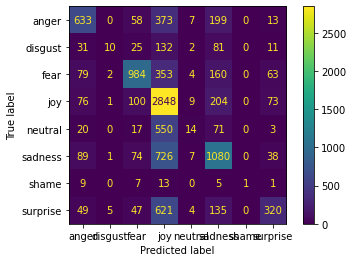

In [163]:
#plot confusion matrix
plot_confusion_matrix(nv_model,X_test,y_test)